In [25]:
import numpy as np
import scipy.integrate
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
def plot_pretty(dpi=150,fontsize=15):
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in')
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5)
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5)
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    plt.rc('legend',fontsize=5)
    plt.rcParams['figure.figsize'] = [5, 4]

In [27]:
def read_and_normalize(filename):
    df = pd.read_csv(filename,header=None).to_numpy()
    integration_time = float(filename.split("-")[1].split("V")[1].split("ms")[0])
    return df[:,1]/integration_time,df[:,0]

In [29]:
colors = ["Red","Green"]
tails = ["50 V 160 ms","70 V 120 ms","90 V 30 ms","110 V 30 ms","130 V 30 ms"]
vs = [int(i.split("V")[0]) for i in tails]
data = {}
for color in colors:
    data[color] = {}
    for tail in tails:
        #data[color][int(tail.split("V")[0])]
        fname = "data/Lab 1 - " + color + " " + tail + ".csv"
        counts,wavelengths = read_and_normalize(fname)
        data[color][int(tail.split("V")[0])] = (counts,wavelengths)

ratios = []
for v in vs:
    red_integ = scipy.integrate.simps(*data["Red"][v])
    green_integ = scipy.integrate.simps(*data["Green"][v])
    ratio = green_integ/red_integ
    ratios.append(ratio)

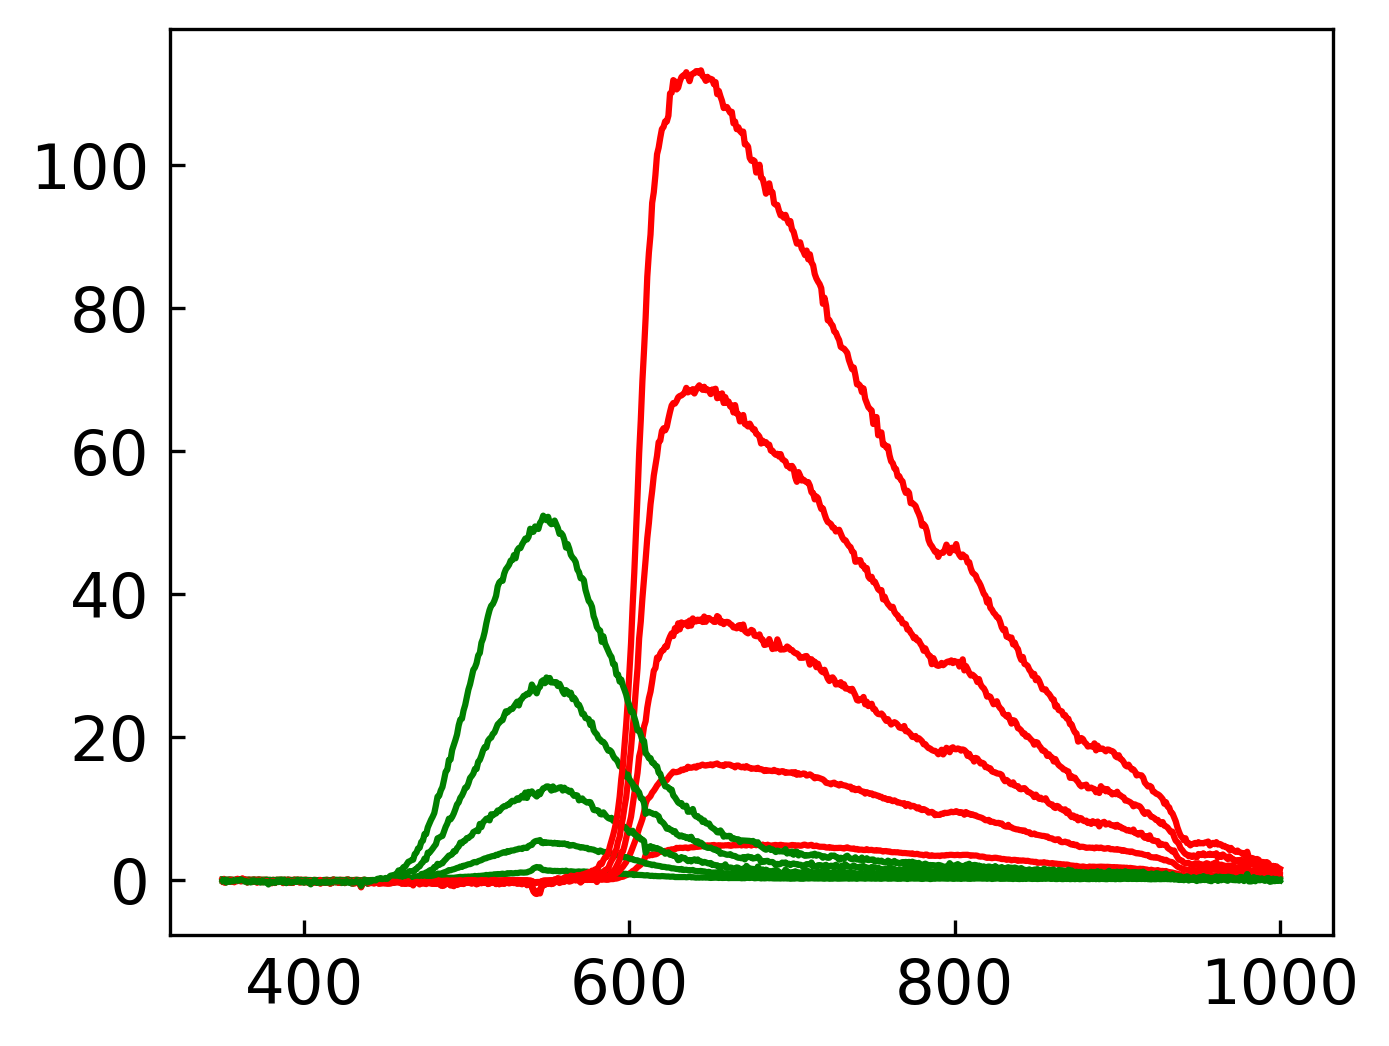

In [40]:
for v in vs:
    red_count,red_wavelength = data["Red"][v]
    green_count,green_wavelength = data["Green"][v]
    plt.plot(red_wavelength,red_count,color="red")
    plt.plot(green_wavelength,green_count,color="green")
plt.show()

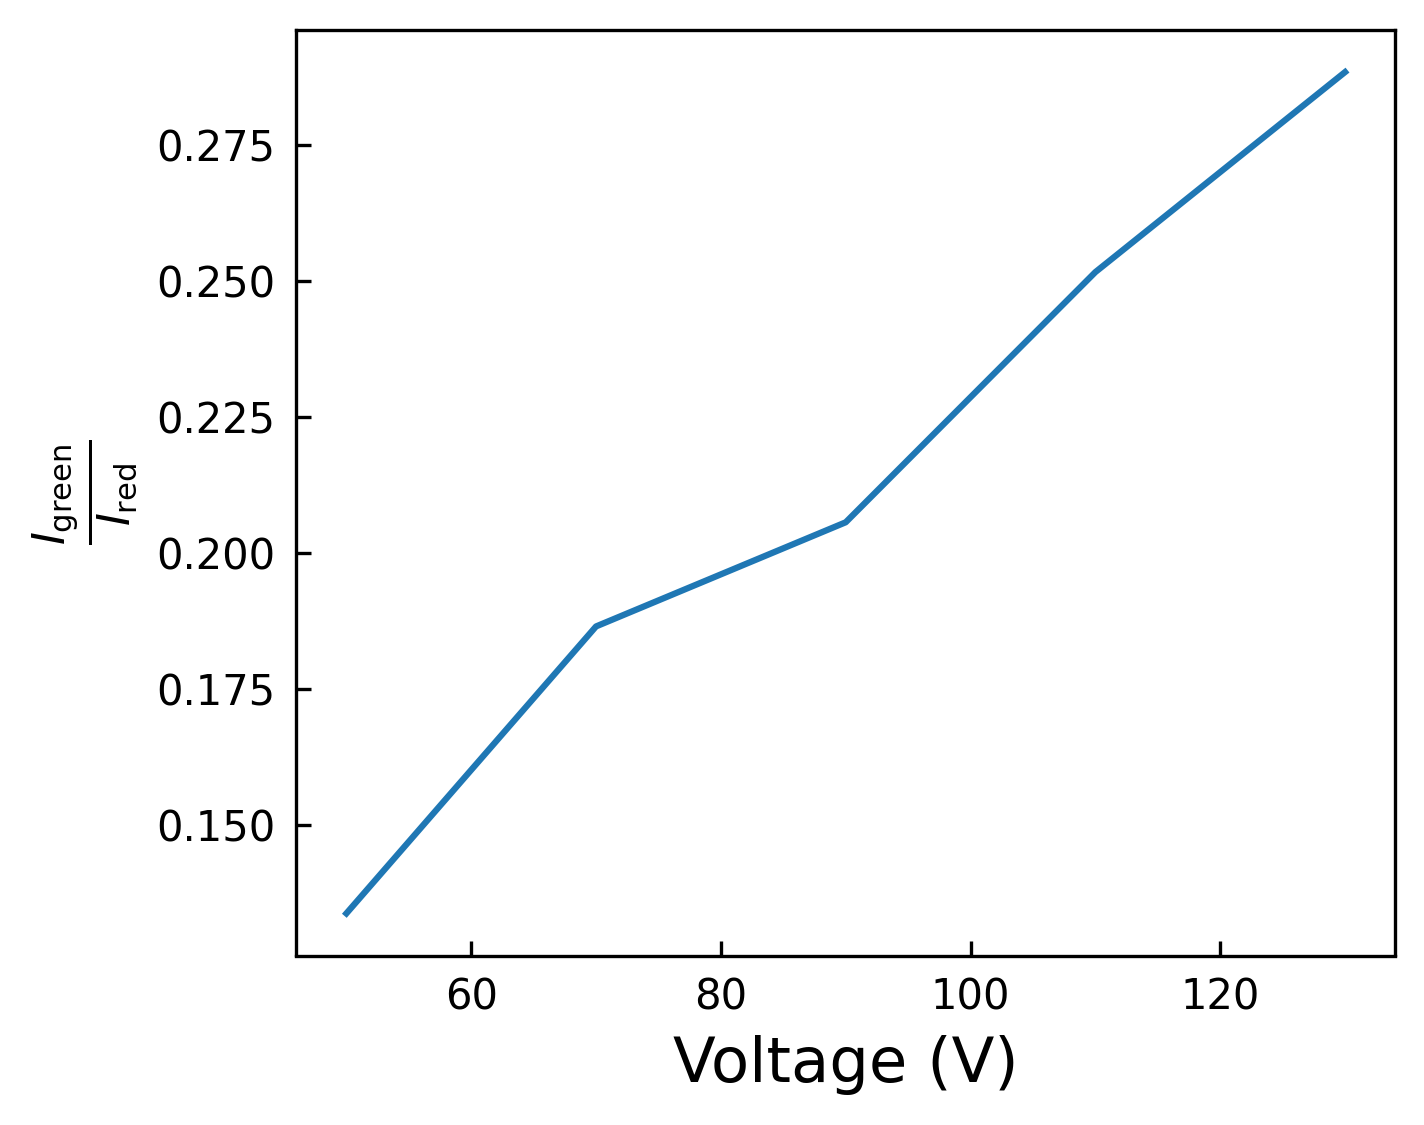

In [38]:
plot_pretty(300)
plt.plot(vs,ratios)
plt.xlabel("Voltage (V)")
plt.ylabel(r"$\frac{I_\mathrm{green}}{I_\mathrm{red}}$")
plt.xticks(size=10)
plt.yticks(size=10)
plt.tight_layout()
plt.show()